## Aprendizaje no supervisado
+ Algoritmos que aprenden desde los datos sin contar con una variable output o etiqueta.
+ Exploración de la base de datos para encontrar patrones subyacientes: grupos similares, objetos anómalos, dimensiones con información significativa.
+ Casos de uso: detección de fraude, reglas de compras, generación de música e imágenes artificiales.

### Clustering
+ Algortimos divisivos y aglomerativos, kmeans es divisivo, desde el total de datos se divide a priori. Jerárquico es aglomerativo: inicialmente cada objeto es un cluster en si mismo.\
+ K-Means:  
   Dominios numéricos, genera conjuntos disjuntos de objetos, el número de segmentos es input. Algoritmo ultra probado. Cada cluster es descrito por su centroide.  
   Métrica de evaluación : distancia inter-clusters. Distancia intra-cluster.  
+ Cluster Jerárquico:  
    Más costoso, en recursos y en tiempo. Menos transparente que KMeans.  
    Distancias : euclideana, minkowski, coseno
+ Reducción de dimensionalidad: PCA, Autoencoder  
    Motivación: la noción de distancia pierde valor a altas dimensiones (ie: todos los puntos están 'cerca' en un sentido u otro)


In [1]:
#K MEANS
# 1. se elige aleatoriamente K centroides
# 2. while criterio = false se asigna cada objeto de la DB a su centroide más cercano
# 3. Se recalculan los centroides
# Criterios de detención: variación nula entre pasos, porcentaje de objetos con variación
# desplazamiento de centroides entre etapas sucesivas.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
mean1 = (3,13)
cov1 = [[2,0],[0,2]]
x1 = np.random.multivariate_normal(mean1,cov1,100)

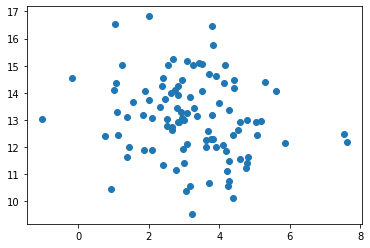

In [4]:
plt.scatter(x1[:,0],x1[:,1])
plt.show()

In [12]:
mean2 = (11,5)
cov2 = [[10,-3],[-3,1]]
x2 = np.random.multivariate_normal(mean2,cov2,100)

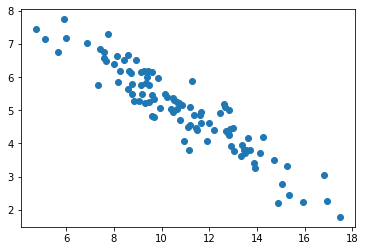

In [10]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

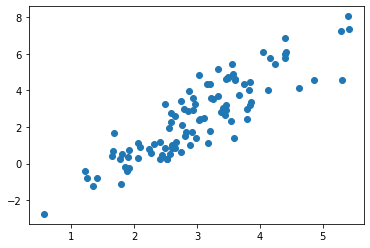

In [13]:
mean3 = (3,2.5)
cov3 = [[1,2],[2,5]]
x3 = np.random.multivariate_normal(mean3,cov3,100)
plt.scatter(x3[:,0],x3[:,1])
plt.show()

In [14]:
X = np.concatenate((x1,x2,x3),axis=0)
X = pd.DataFrame(X, columns=['A','B'])
X = (X-X.min())/(X.max()-X.min())

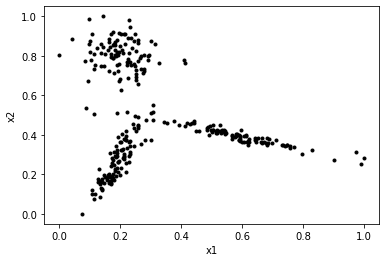

In [18]:
plt.plot(X['A'],X['B'],'k.')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [26]:
nclus=3
km = KMeans(n_clusters=nclus)
km.fit(X)

KMeans(n_clusters=3)

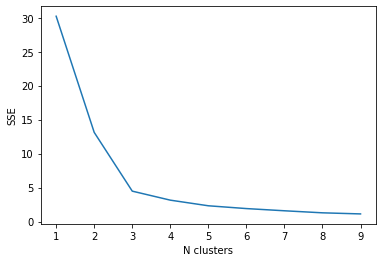

In [22]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ #sum squared error
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('N clusters')
plt.ylabel('SSE')
plt.show()

In [27]:
#3 clusters es el óptimo en este caso (el codo o inflexión marcada)
km.cluster_centers_

array([[0.20280689, 0.80580436],
       [0.19539793, 0.2877914 ],
       [0.60291333, 0.38976022]])

In [28]:
km.inertia_

4.4715404422613085

In [29]:
X['clase'] = km.labels_

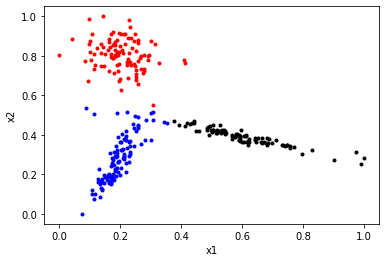

In [32]:
marks = ['r.','b.','k.']
for i in range(0,nclus):
    plt.plot(X['A'][X['clase']==i],X['B'][X['clase']==i],marks[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [34]:
## Clústering Jerárquico
#1. cada punto es un cluster
#2. cada iteración agrupa clusters cercanos
#3. termina cuando todos los datos son un unico cluster

#modos de unión
#simple: 2 elementos más cercanos entre distintos clusters
#completa: menos distancia entre los puntos más lejanos de 
#2 clusters disjuntos
#distancia promedio: poco sensible a formas irregulares
#promedio entre pares: más descriptiva pero más costosa

#Dendograma: eje Y: distancia entre datos o clusters
#los más distantes se unen arriba


### Métricas de evaluación:
1. índice Davies-Bouldin promedio de la máxima distancia intra cluster sobre la distancia entre pares (diferenciacion de clusters). Evalua a la vez lo compacto de un cluster y su distancia a los demás.

2. Coherencia: distancia promedio más pequeña del objeto i al resto de los puntos en otros clusters menos la distancia promedio del objeto i al resto de los puntos del cluster sobre el máximo entre los dos. ie: coherencia del objeto dentro de su cluster

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=1).fit(X)
    labels = kmeans.labels_
    print(f'{str(k)} clusters')
    index = davies_bouldin_score(X,labels)
    print(f'Davies-Bouldin score : {str(index)}')

2 clusters
Davies-Bouldin score : 1.5454639425125356
3 clusters
Davies-Bouldin score : 1.9971846210203135
4 clusters
Davies-Bouldin score : 1.9725414435509194
5 clusters
Davies-Bouldin score : 1.884037106801737
6 clusters
Davies-Bouldin score : 1.8144011609432864
7 clusters
Davies-Bouldin score : 1.7307744214068477
8 clusters
Davies-Bouldin score : 1.7727781820649384
9 clusters
Davies-Bouldin score : 1.6875880141672583


In [7]:
#plot silueta
#!pip install yellowbrick

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(n_clusters=6, random_state=42))

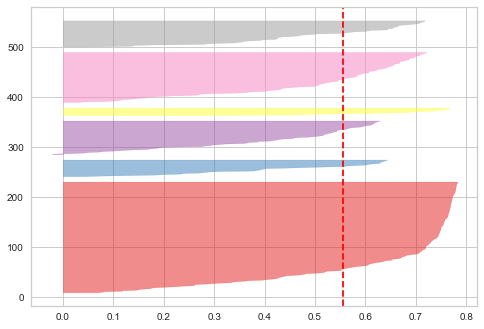

In [10]:
X,y = load_nfl()
features = ['Rec','Yds','TD','Fmb']
model = KMeans(6,random_state=42)
plot = SilhouetteVisualizer(model)
plot.fit(X)

### Reducción de dimensionalidad:
+ PCA
+ Autoencoders : red entrenada para replicar el input en el output. Se pasa por un cuello de botella de menor dimensionalidad (espacio latente).

In [11]:
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd

In [12]:
X,y = load_digits(return_X_y = True)

In [13]:
norm = StandardScaler()
x_std = norm.fit_transform(X)
x_std.shape

(1797, 64)

In [14]:
pca = PCA(n_components=2)
X_trans = pca.fit_transform(x_std)
X_trans = pd.DataFrame(X_trans, columns=['C1','C2'])
X_trans['label'] = y

In [16]:
X_trans.tail(3)

,C1,C2,label
1794,1.022594,-0.147878,8
1795,1.076054,-0.380942,9
1796,-1.257696,-2.227588,8


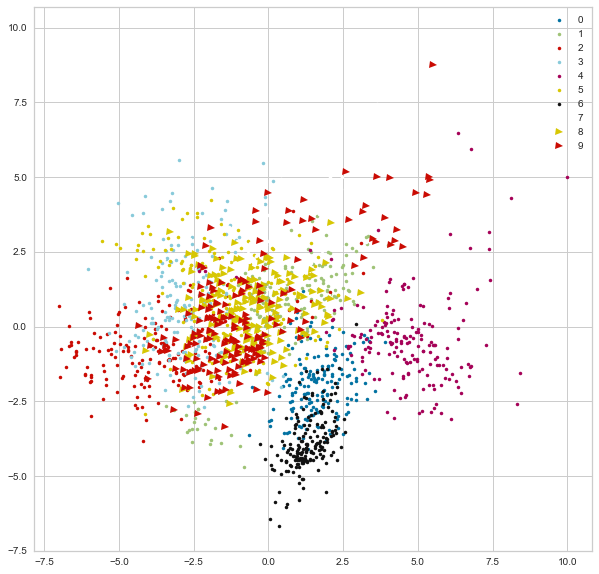

In [17]:
plt.figure(figsize=(10,10))
colores = ['b.','g.','r.','c.','m.','y.','k.','w.','y>','r>']
for i in range(0,10):
    plt.plot(X_trans['C1'][X_trans['label']==i],
             X_trans['C2'][X_trans['label']==i],colores[i],label=i)
plt.legend()
plt.show()
    